In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('C:/Users/ajean/Documents/proyecto-data-science/DATASETS/casos_covid_provincia.csv', sep=';', decimal=',')

In [3]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,01/01/2020,Alicante,0,0,0,0,0,0
1,01/01/2020,Albacete,0,0,0,0,0,0
2,01/01/2020,Almeria,0,0,0,0,0,0
3,01/01/2020,Avila,0,0,0,0,0,0
4,01/01/2020,Barcelona,0,0,0,0,0,0


In [4]:
df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [5]:
df.fecha=pd.to_datetime(df.fecha, format="%d/%m/%Y")

In [6]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,2020-01-01,Alicante,0,0,0,0,0,0
1,2020-01-01,Albacete,0,0,0,0,0,0
2,2020-01-01,Almeria,0,0,0,0,0,0
3,2020-01-01,Avila,0,0,0,0,0,0
4,2020-01-01,Barcelona,0,0,0,0,0,0


In [7]:
baleares_df = df[df["provincia"] == "Islas Baleares"]
baleares_df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
36,2020-01-01,Islas Baleares,0,0,0,0,0,0
89,2020-01-02,Islas Baleares,0,0,0,0,0,0
142,2020-01-03,Islas Baleares,0,0,0,0,0,0
195,2020-01-04,Islas Baleares,0,0,0,0,0,0
248,2020-01-05,Islas Baleares,0,0,0,0,0,0


In [8]:
baleares_df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [9]:
baleares_df2 = baleares_df.set_index('fecha').resample('W')[['num_casos']].sum()

In [10]:
baleares_df2.head()

,num_casos
fecha,
2020-01-05,0
2020-01-12,0
2020-01-19,0
2020-01-26,0
2020-02-02,1


In [11]:
baleares_df2.tail()

,num_casos
fecha,
2022-01-09,27071
2022-01-16,23126
2022-01-23,22754
2022-01-30,11288
2022-02-06,3865


<AxesSubplot:xlabel='fecha'>

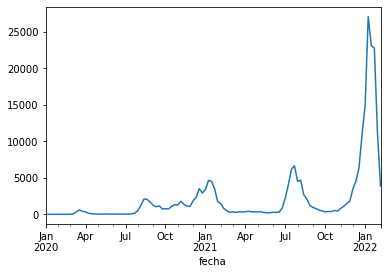

In [12]:
baleares_df2['num_casos'].plot()

In [13]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':baleares_df2.index,'y':baleares_df2.num_casos})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
fecha,,
2020-01-05,2020-01-05,0
2020-01-12,2020-01-12,0
2020-01-19,2020-01-19,0
2020-01-26,2020-01-26,0
2020-02-02,2020-02-02,1


In [16]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-05,431.998416,-1944.785156,2611.166503
1,2020-01-12,3308.706380,858.226784,5623.294148
2,2020-01-19,3196.286452,755.247156,5527.488660
3,2020-01-26,686.554303,-1594.418858,3004.886311
4,2020-02-02,-1969.943893,-4337.943600,463.234522


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135,2022-08-07,14569.430109,7333.413747,20981.115362,8457.141546,20946.613127,-402.913606,-402.913606,-402.913606,-402.913606,-402.913606,-402.913606,0.0,0.0,0.0,14166.516503
136,2022-08-14,14784.415636,7154.585817,20953.963013,8261.126749,21515.172654,-772.257676,-772.257676,-772.257676,-772.257676,-772.257676,-772.257676,0.0,0.0,0.0,14012.157960
137,2022-08-21,14999.401162,6125.646370,21177.747879,7981.412072,22056.189132,-1216.311343,-1216.311343,-1216.311343,-1216.311343,-1216.311343,-1216.311343,0.0,0.0,0.0,13783.089820
138,2022-08-28,15214.386689,5428.023181,20794.280330,7676.174612,22571.349336,-1963.752976,-1963.752976,-1963.752976,-1963.752976,-1963.752976,-1963.752976,0.0,0.0,0.0,13250.633713
139,2022-09-04,15429.372216,4492.944489,20956.697743,7481.296390,23180.319831,-2813.754740,-2813.754740,-2813.754740,-2813.754740,-2813.754740,-2813.754740,0.0,0.0,0.0,12615.617476


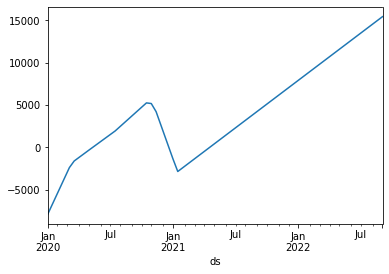

In [ ]:
forecast.set_index('ds')['trend'].plot()

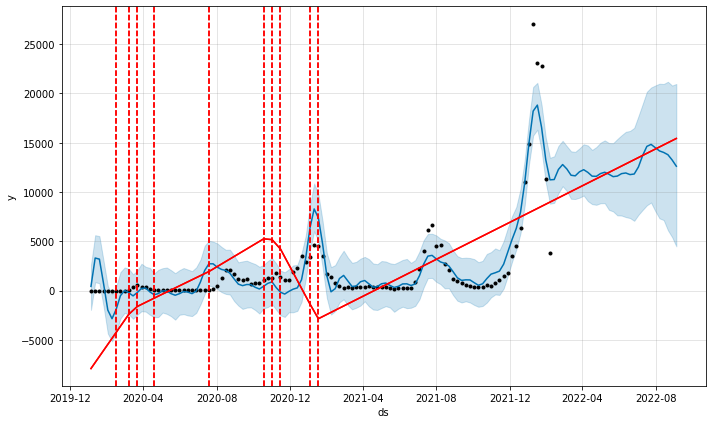

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

In [ ]:
# Guardamos el resultado en un fichero covid_baleares.csv separado por comas. 
forecast.to_csv('covid_baleares.csv',  index=False, sep=";", decimal=",")

In [ ]:
# Guardamos el resultado en un fichero covid_baleares.csv separado por comas. 
baleares_df2.to_csv('covid1_baleares.csv',  index=False, sep=",", decimal=",")